# GRIP : The Sparks Foundation

## Data Science & Business Analytics Intern

## Author : Alpesh Patel

# Task 6 : Prediction using Decision Tree

### Dataset - Iris Dataset
Link of dataset - https://bit.ly/2G6sYx9

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

## Reading data
Data can be found at https://bit.ly/2G6sYx9

In [2]:
Iris_df = pd.read_csv("Iris.csv")
Iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
Iris_df.shape

(150, 6)

In [4]:
Iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Unique value in each columns
for i in Iris_df.columns:
    print(i, "\t\t", len(Iris_df[i].unique()))

Id 		 150
SepalLengthCm 		 35
SepalWidthCm 		 23
PetalLengthCm 		 43
PetalWidthCm 		 22
Species 		 3


In [6]:
list_columns = Iris_df.columns
list_columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Find averge , min, max, etc... for Continuous Variable

In [7]:
Iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Text(0.5, 1.0, 'Visualize average, numberOf, min, max, std, Queartile')

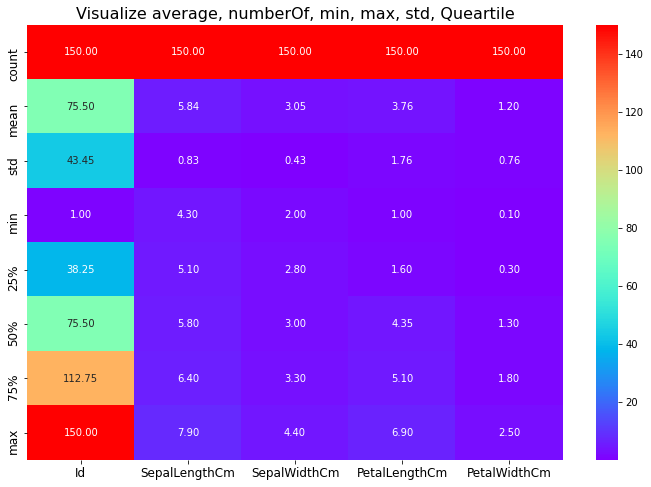

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(Iris_df.describe(), annot = True, fmt = '.2f', cmap = 'rainbow')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Visualize average, numberOf, min, max, std, Queartile", fontsize = 16)

## Relationship between the data

In [9]:
Iris_df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


Text(0.5, 1.0, 'Visualize average, numberOf, min, max, std, Queartile')

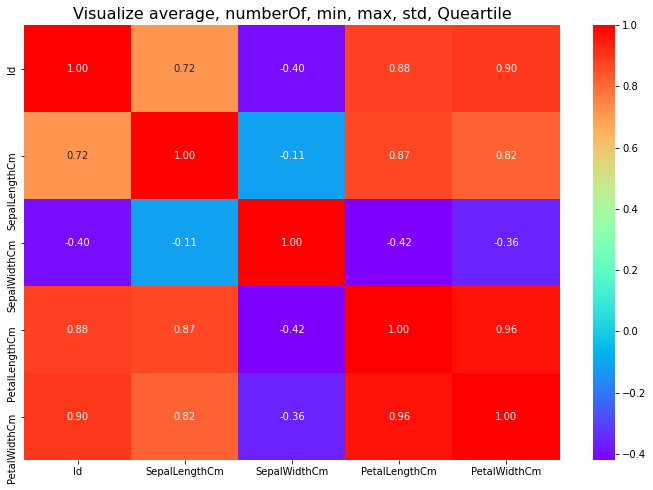

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(Iris_df.corr(), annot = True, fmt = '.2f', cmap = 'rainbow')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title("Visualize average, numberOf, min, max, std, Queartile", fontsize = 16)

## Cheack Missing value

In [11]:
# cheack missing value
Iris_df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No missing value avalible

## Encoding catagorical variable

In [12]:
Iris_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [13]:
from sklearn import preprocessing

Iris_df['Species'] = preprocessing.LabelEncoder().fit_transform(Iris_df['Species'])

In [14]:
Iris_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

## Split dependent and independent data

In [15]:
X = Iris_df.iloc[:, 1:5].values
y = Iris_df.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

>## The Decision Tree Algorithm

## Training the Decision Tree Classification model on the Training set

In [18]:
from sklearn.tree import DecisionTreeClassifier 

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

print("The Decision Tree Classification model trained")

The Decision Tree Classification model trained


## Visualize the Decision Tree

In [19]:
from sklearn import tree

classifier_tree = tree.DecisionTreeClassifier()
classifier_tree = classifier_tree.fit(X_train, y_train)

In [20]:
# text graph representaion

text_representation = tree.export_text(classifier_tree)
print(text_representation)

|--- feature_3 <= -0.58
|   |--- class: 0
|--- feature_3 >  -0.58
|   |--- feature_2 <= 0.66
|   |   |--- feature_3 <= 0.57
|   |   |   |--- class: 1
|   |   |--- feature_3 >  0.57
|   |   |   |--- feature_1 <= 0.08
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  0.08
|   |   |   |   |--- class: 1
|   |--- feature_2 >  0.66
|   |   |--- feature_2 <= 0.71
|   |   |   |--- feature_3 <= 0.77
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.77
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  0.71
|   |   |   |--- class: 2



[Text(401.76000000000005, 782.784, 'X[3] <= -0.579\ngini = 0.666\nsamples = 100\nvalue = [34, 31, 35]'),
 Text(301.32000000000005, 608.832, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(502.20000000000005, 608.832, 'X[2] <= 0.656\ngini = 0.498\nsamples = 66\nvalue = [0, 31, 35]'),
 Text(200.88000000000002, 434.88, 'X[3] <= 0.573\ngini = 0.165\nsamples = 33\nvalue = [0, 30, 3]'),
 Text(100.44000000000001, 260.928, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(301.32000000000005, 260.928, 'X[1] <= 0.078\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 86.976, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(401.76000000000005, 86.976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(803.5200000000001, 434.88, 'X[2] <= 0.711\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]'),
 Text(703.08, 260.928, 'X[3] <= 0.765\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(602.6400000000001, 86.976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]')

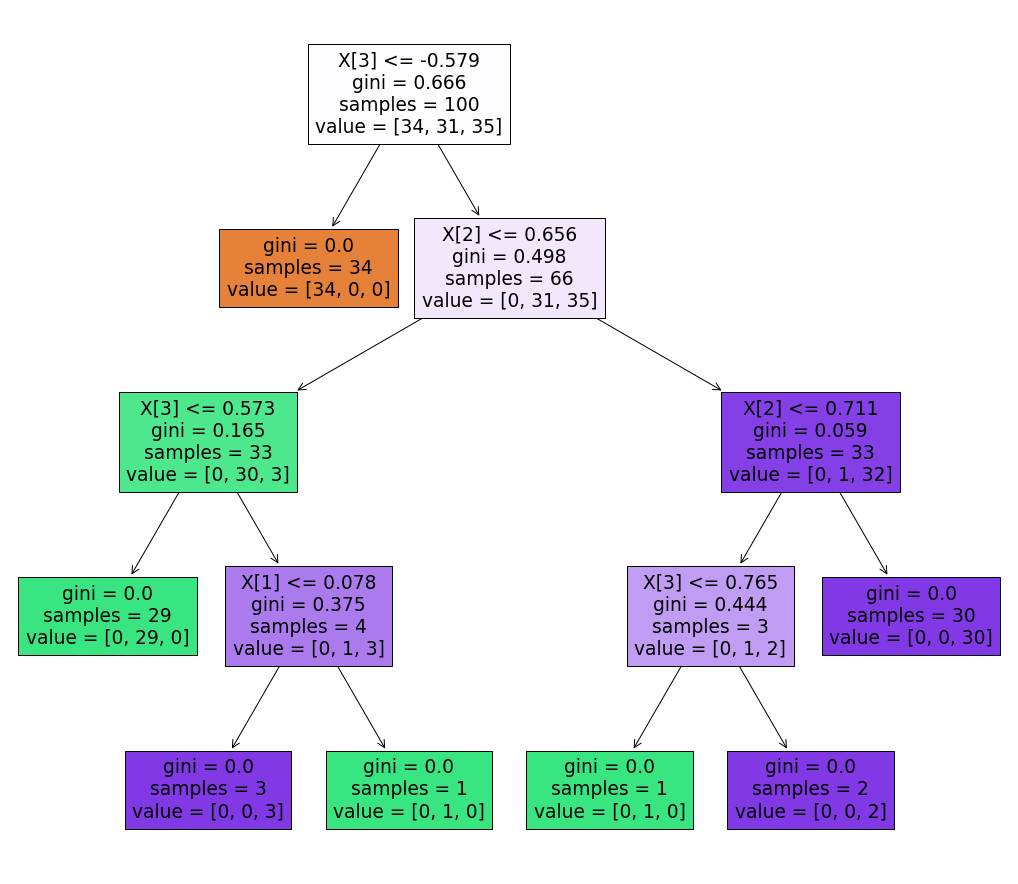

In [21]:
# Decision Trees plot
plt.figure(figsize=(18, 16))
tree.plot_tree(classifier_tree, filled=True, impurity=True)

## Making Predictions OR Predicting the Test set

In [22]:
y_pred = classifier.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2])

# Accuracy of our model

In [23]:
print("Accuracy score : ", np.mean(y_pred==y_test))

Accuracy score :  0.96


## Making the Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]


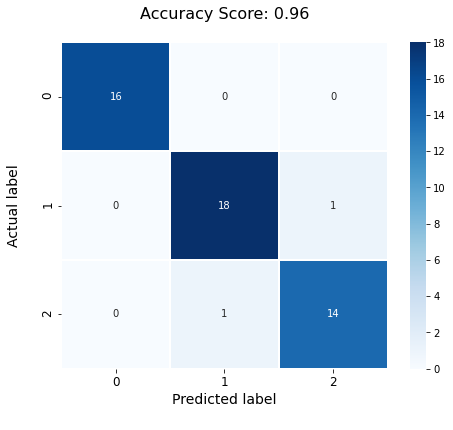

In [25]:
# plot confusion matrix

score = np.mean(y_pred==y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Blues');
plt.title('Accuracy Score: {}\n'.format(score), size = 16);
plt.xlabel('Predicted label\n', fontsize = 14);
plt.ylabel('Actual label\n', fontsize = 14);
plt.tick_params(labelsize= 12)
plt.show()

In [26]:
cm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of model : ", cm_accuracy)

Accuracy of model :  0.96


## Classification_report

In [27]:
from sklearn import metrics

print (metrics.classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.95      0.95      0.95        19
           2       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



## Conclusion

This classifier model can predict the Species of the flower with **96 %** Percent Accuarcy score